## $V_B^-$ coupled to three nitrogen nuclear spins via Fermi contact

In [1]:
from qutip import *
from matplotlib.pyplot import figure
from scipy.signal import argrelextrema
import numpy as np
import scipy as sp
import time
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

In [2]:
plt.rc('text.latex', preamble=r'\usepackage{amsmath,bbm,dsfont}')

In [4]:
#Nuclear Spins
N = 3
spin = 1

Ix = spin_Jx(1)
Iy = spin_Jy(1)
Iz = spin_Jz(1)
iden = identity(3)

In [5]:
#Electron Spins
Sx, Sy, Sz = sigmax(), sigmay(), sigmaz()

In [6]:
# zero field splitting
Dzfs = 2*np.pi*3.471e9

# gyromagnetic ratios
gammae = 2*np.pi*2.79925e10
gammaN = 2*np.pi*3.078e6

# background magnetic field
# B0 = 0.33e-3

# Fermi contact hyperfine coupling
# Ahf_xx = 2*np.pi*np.array([80.219, 46.110, 80.202])*1e6
# Ahf_yy = 2*np.pi*np.array([57.486, 91.571, 57.479])*1e6
# Ahf_zz = 2*np.pi*np.array([47.957, 47.935, 47.935])*1e6
# Ahf_xy = 2*np.pi*np.array([19.687, -0.004, -19.687])*1e6

# Fermi contact hyperfine coupling
Ahf_xx = 2*np.pi*np.array([ 79.406, 46.944, 79.406])*1e6
Ahf_yy = 2*np.pi*np.array([ 58.170, 90.025, 58.170])*1e6
Ahf_zz = 2*np.pi*np.array([ 48.159, 48.158, 48.159])*1e6
Ahf_xy = 2*np.pi*np.array([ 18.391, 0.000, -18.391])*1e6

# Normalization
units = 2*np.pi*1e6
De = Dzfs/units
ge = gammae/units
gN = gammaN/units

Axx = Ahf_xx/units
Ayy = Ahf_yy/units
Azz = Ahf_zz/units
Axy = Ahf_xy/units

A_perp = (Axx + Ayy)/np.sqrt(2)
B_perp = (Axx - Ayy)/np.sqrt(2)

AA = [Axx, Ayy, Azz, Axy, A_perp, B_perp]

In [6]:
#interaction operators
SIxx = [tensor(Sx,Ix,iden,iden),tensor(Sx,iden,Ix,iden),tensor(Sx,iden,iden,Ix)]
SIyy = [tensor(Sy,Iy,iden,iden),tensor(Sy,iden,Iy,iden),tensor(Sy,iden,iden,Iy)]
SIzz = [tensor(Sz,Iz,iden,iden),tensor(Sz,iden,Iz,iden),tensor(Sz,iden,iden,Iz)]
SIxy = [tensor(Sx,Iy,iden,iden),tensor(Sx,iden,Iy,iden),tensor(Sx,iden,iden,Iy)]
SIyx = [tensor(Sy,Ix,iden,iden),tensor(Sy,iden,Ix,iden),tensor(Sy,iden,iden,Ix)]

In [7]:
#initial state
#electron state
ket0 = basis(2,0)
ket1 = basis(2,1)
xp = (ket0 + ket1)/np.sqrt(2)
xm = (ket0 - ket1)/np.sqrt(2)
rho_ep = xp*xp.dag()
rho_em = xm*xm.dag()
yp = (ket0 + 1j*ket1)/np.sqrt(2)
ym = (ket0 - 1j*ket1)/np.sqrt(2)
rho_epy = yp*yp.dag()
rho_emy = ym*ym.dag()

#set rubik state
ket_z = basis(3,1)
ket_x = (basis(3,0) - basis(3,2))/np.sqrt(2)
ket_y = (basis(3,0) + basis(3,2))/np.sqrt(2)

#initial nuclear
rho_n1 = ket_z*ket_z.dag()
rho_n = tensor(rho_n1,rho_n1,rho_n1) # |zzz>

#initial state
rho_0 = tensor(fock_dm(2,0),rho_n) # |+z>|zzz>
# rho_0 = tensor(rho_epy,rho_n)

#projective measurement
Pqz_xp = tensor(xp*xp.dag(),iden,iden,iden)
Pqz_xm = tensor(xm*xm.dag(),iden,iden,iden)

In [8]:
#projection in rubik states
P_z = ket_z*ket_z.dag()
P_x = ket_x*ket_x.dag()
P_y = ket_y*ket_y.dag()

P_xy = P_x + P_y
P_zx = P_z + P_x
P_yz = P_y + P_z

X_xy = ket_x*ket_y.dag() + ket_y*ket_x.dag()
X_zx = ket_z*ket_x.dag() + ket_x*ket_z.dag()
X_yz = ket_y*ket_z.dag() + ket_z*ket_y.dag()

Y_xy = (1j)*ket_x*ket_y.dag() - (1j)*ket_y*ket_x.dag()
Y_zx = (1j)*ket_z*ket_x.dag() - (1j)*ket_x*ket_z.dag()
Y_yz = (1j)*ket_y*ket_z.dag() - (1j)*ket_z*ket_y.dag()

Z_xy = ket_x*ket_x.dag() - ket_y*ket_y.dag()
Z_zx = ket_z*ket_z.dag() - ket_x*ket_x.dag()
Z_yz = ket_y*ket_y.dag() - ket_z*ket_z.dag()

Xc_xy = tensor(X_xy,X_xy,X_xy)
Xc_zx = tensor(X_zx,X_zx,X_zx)
Xc_yz = tensor(X_yz,X_yz,X_yz)

Yc_xy = tensor(Y_xy,Y_xy,Y_xy)
Yc_zx = tensor(Y_zx,Y_zx,Y_zx)
Yc_yz = tensor(Y_yz,Y_yz,Y_yz)

Zc_xy = tensor(Z_xy,Z_xy,Z_xy)
Zc_zx = tensor(Z_zx,Z_zx,Z_zx)
Zc_yz = tensor(Z_yz,Z_yz,Z_yz)

#rotating in Z
U_z1 = tensor(P_z - P_xy,P_z - P_xy,P_z - P_xy) #pi rotation
U_z2 = tensor(P_z + (1j)*X_xy,P_z + (1j)*X_xy,P_z + (1j)*X_xy) #pi over 2 
U_z4 = tensor(P_z + (P_xy + (1j)*X_xy)/np.sqrt(2),P_z + (P_xy + (1j)*X_xy)/np.sqrt(2),P_z + (P_xy + (1j)*X_xy)/np.sqrt(2)) #pi over 4

E_z2 = (U_z2 + U_z2.dag())/2
O_z2 = (U_z2 - U_z2.dag())/2
E_z4 = (U_z4 + U_z4.dag())/2
O_z4 = (U_z4 - U_z4.dag())/2

#rotating in X
U_x1 = tensor(P_x - P_yz,P_x - P_yz,P_x - P_yz) #pi rotation
U_x2 = tensor(P_x + (1j)*X_yz,P_x + (1j)*X_yz,P_x + (1j)*X_yz) #pi over 2 
U_x4 = tensor(P_x + (P_yz + (1j)*X_yz)/np.sqrt(2),P_x + (P_yz + (1j)*X_yz)/np.sqrt(2),P_x + (P_yz + (1j)*X_yz)/np.sqrt(2)) #pi over 4

E_x2 = (U_x2 + U_x2.dag())/2
O_x2 = (U_x2 - U_x2.dag())/2
E_x4 = (U_x4 + U_x4.dag())/2
O_x4 = (U_x4 - U_x4.dag())/2

#rotating in Y
U_y1 = tensor(P_y - P_zx,P_y - P_zx,P_y - P_zx) #pi rotation
U_y2 = tensor(P_y + (1j)*Y_zx,P_y + (1j)*Y_zx,P_y + (1j)*Y_zx) #pi over 2 
U_y4 = tensor(P_y + (P_zx + (1j)*Y_zx)/np.sqrt(2),P_y + (P_zx + (1j)*Y_zx)/np.sqrt(2),P_y + (P_zx + (1j)*Y_zx)/np.sqrt(2)) #pi over 4

E_y2 = (U_z2 + U_z2.dag())/2
O_y2 = (U_z2 - U_z2.dag())/2
E_y4 = (U_z4 + U_z4.dag())/2
O_y4 = (U_z4 - U_z4.dag())/2

In [9]:
#target state: Z*rho0
rho_targ = Zc_yz*rho_n*Zc_yz

In [10]:
#simple test
U_ent = tensor(rho_ep,U_z1) + tensor(rho_em,U_z1.dag())
rho_ztest = (U_ent*rho_0*U_ent.dag()).unit() #(Pqz_xp*(U_ent*rho_0*U_ent.dag())*Pqz_xp).unit()
fidelity(rho_targ,rho_ztest.ptrace([1,2,3]))

1.0

## Calculation Part

In [11]:
# testing part
#B0 = 125.614e-3 # Delta ~ A
B0 = 0e-3 # fast Delta Sigma
#B0 = 124.84038e-3 # Sigma << Delta

A_perp = (Axx + Ayy)/(2*np.sqrt(2))
B_perp = (Axx - Ayy)/(2*np.sqrt(2))
w0 = ge*B0 - De
wn = gN*B0
w = np.array([wn,wn,wn]) - 0.5*Azz
Delta = np.array([w0,w0,w0]) - w
Sigma = np.array([w0,w0,w0]) + w

N_rev = 1 #revolution rotation, will change to N_alpha in mitigation  but do we need that in I_z? maybe no

#set gate operation time
def T(phi,a):
    if a=='z':
        return (2*(phi)/Azz.mean()) #in (2*np.pi*1e6)^-1 sec
    elif a=='x':
        return ((phi)/A_perp.mean()) #in (2*np.pi*1e6)^-1 sec TO BE CORRECTED
    else:
        return ((phi)/A_perp.mean()) #in (2*np.pi*1e6)^-1 sec TO BE CORRECTED
    
#set time duration with level not branch
T_z = T(np.pi,'z')/N_rev # set phi = N*T*A, T = (phi)/N*A

In [12]:
Delta

array([-3446.9205, -3446.921 , -3446.9205])

In [13]:
Sigma

array([-3495.0795, -3495.079 , -3495.0795])

In [14]:
A_perp

array([48.64046126, 48.42585436, 48.64046126])

In [15]:
np.abs(Axx).sum() + np.abs(Ayy).sum() + np.abs(Axy).sum()

448.903

In [16]:
a_dist = (A_perp/Delta) #*1e3
a_dist

array([-0.01411128, -0.01404902, -0.01411128])

In [17]:
((np.pi)*(Azz.mean()/2))/a_dist

array([-5360.7791231 , -5384.53705307, -5360.7791231 ])

In [18]:
Delta.mean()/Azz.mean()

-71.57425454746809

In [19]:
#Effective Hamiltonian
def H_exact_B(t,B0):
    Axx = AA[0]
    Ayy = AA[1]
    Azz = AA[2]
    Axy = AA[3]

    A_perp = (Axx + Ayy)/(2*np.sqrt(2))
    B_perp = (Axx - Ayy)/(2*np.sqrt(2))
    w0 = - ge*B0 + De
    wn = gN*B0
    w = np.array([wn,wn,wn]) + 0.5*Azz
    Delta = np.array([w0,w0,w0]) - w
    Sigma = np.array([w0,w0,w0]) + w

    
    Hz = 0
    for k in range(3):
        Hz += Azz[k]*SIzz[k]/2

    
    #rotating terms
    H_Delta = 0
    for k in range(3):
        H_Delta += A_perp[k]*np.cos(Delta[k]*t)*(SIxx[k] + SIyy[k])
        H_Delta -= A_perp[k]*np.sin(Delta[k]*t)*(SIxy[k] - SIyx[k])
        # H_Delta += A_perp[k]*np.cos(Delta[k]*t)*SIxx[k]
        # H_Delta -= A_perp[k]*np.sin(Delta[k]*t)*(-SIyx[k])

        
    #counter rotating terms
    H_Sigma = 0
    for k in range(3):
        H_Sigma += B_perp[k]*np.cos(Sigma[k]*t)*(SIxx[k] - SIyy[k])
        H_Sigma += B_perp[k]*np.sin(Sigma[k]*t)*(SIyx[k] + SIxy[k])
        H_Sigma -= Axy[k]*np.sin(Sigma[k]*t)*(SIxx[k] - SIyy[k])/(2*np.sqrt(2))
        H_Sigma += Axy[k]*np.cos(Sigma[k]*t)*(SIxy[k] + SIyx[k])/(2*np.sqrt(2))

    
    H = Hz + H_Delta + H_Sigma

    return H

In [20]:
M = 100
fold = 1.25
M_ref = int(M//fold)
tlist = np.linspace(0, fold*T_z, M+1) # U_z

# Blist = [1,2,3,4,5] #
# Blist = [0,0.05,0.1,0.123,10]
Blist1 = [0,0.1,0.5,0.7]

#fidelity
# fidel = np.zeros(shape=[len(Blist),len(tlist)])
fidel_exact = np.zeros(shape=[len(Blist1),len(tlist)])

cP_yz = tensor(qeye(2),P_yz,P_yz,P_yz)
# oper_targ = -cP_yz*tensor(qeye(2),Zc_yz)*cP_yz
oper_targ = -tensor(qeye(2),Zc_yz)


for k in range(len(Blist1)):
    B0 = Blist1[k]
    def H_exact(t):
        return H_exact_B(t,B0)
        
    # prop = propagator(QobjEvo(H_z),tlist)
    prop_exact = propagator(QobjEvo(H_exact),tlist)
    
    for j in range(len(tlist)):
        # prop[j] = cP_yz*prop[j]*cP_yz
        # prop_exact[j] = cP_yz*prop_exact[j]*cP_yz
        prop_exact[j] = prop_exact[j]*cP_yz
    
    for j in range(len(tlist)):
        # fidel[k,j] = average_gate_fidelity(prop[j], oper_targ)/average_gate_fidelity(oper_targ, oper_targ)
        fidel_exact[k,j] = average_gate_fidelity(prop_exact[j], oper_targ)/average_gate_fidelity(oper_targ, oper_targ)

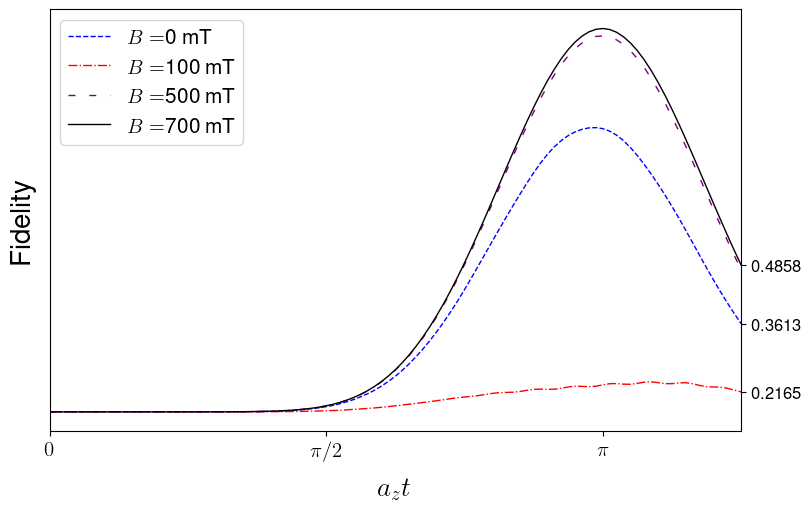

In [21]:
fig, axis = plt.subplots(layout='constrained',sharex=True,sharey=False,figsize=(8,5))

CR = ['b','r','purple','k']
CS = ['--', '-.',(0, (5, 10)),'-']

line = [[] for k in range(len(Blist1))]
# line[0], = axis.plot(tlist*Azz.mean()/2, fidel[:], 'b', lw=1, label=r"Ideal")
for k in range(len(Blist1)):
    line[k], = axis.plot(tlist*Azz.mean()/2, fidel_exact[k,:], CR[k], ls=CS[k], lw=1, label=r"$B =$"+str(int(Blist1[k]*1e3))+r" mT")

max_list = [np.around(fidel_exact[k,M],decimals=4) for k in [0,1,3]]
# max_list = [np.around(fidel_exact[k,M],decimals=4) for k in range(len(Blist1))]

axis.set_xlabel(r'$a_zt~$', fontsize=20, labelpad=10)
axis.set_xticks(np.array([0,np.pi/2,np.pi]),[r'$0$',r'$\pi/2$',r'$\pi$'], fontsize=15)
axis.set_ylabel(r'Fidelity', fontsize=20, labelpad=10)
axis.set_yticks(max_list,max_list, fontsize=12)
axis.autoscale(enable=True, axis='x', tight=True)
axis.legend(handles=line, fontsize=15,loc='upper left')

#axis.yaxis.set_label_position("right")
axis.yaxis.tick_right()


# axis.text(0.05, 0.90, r'b.)',transform=axis.transAxes,size=15)

plt.savefig('Fidelity_Weyl_Z-zy-axis.pdf',bbox_inches='tight')


In [22]:
# M = 100
# fold = 1
# tlist = np.linspace(0, fold*T_z, M+1) # U_z
# K = 16*M//10
# Blist = np.linspace(0, 1, K+1)

# #fidelity
# fidel_mesh = np.zeros(shape=[len(Blist),len(tlist)])

# cP_yz = tensor(qeye(2),P_yz,P_yz,P_yz)
# oper_targ = -tensor(qeye(2),Zc_yz)


# for k in range(len(Blist)):
#     B0 = Blist[k]
#     def H_exact(t):
#         return H_exact_B(t,B0)
        
#     # prop = propagator(QobjEvo(H_z),tlist)
#     prop_exact = propagator(QobjEvo(H_exact),tlist)
    
#     for j in range(len(tlist)):
#         # prop[j] = cP_yz*prop[j]*cP_yz
#         prop_exact[j] = prop_exact[j]*cP_yz
    
#     for j in range(len(tlist)):
#         fidel_mesh[k,j] = average_gate_fidelity(prop_exact[j], oper_targ)/average_gate_fidelity(oper_targ, oper_targ)

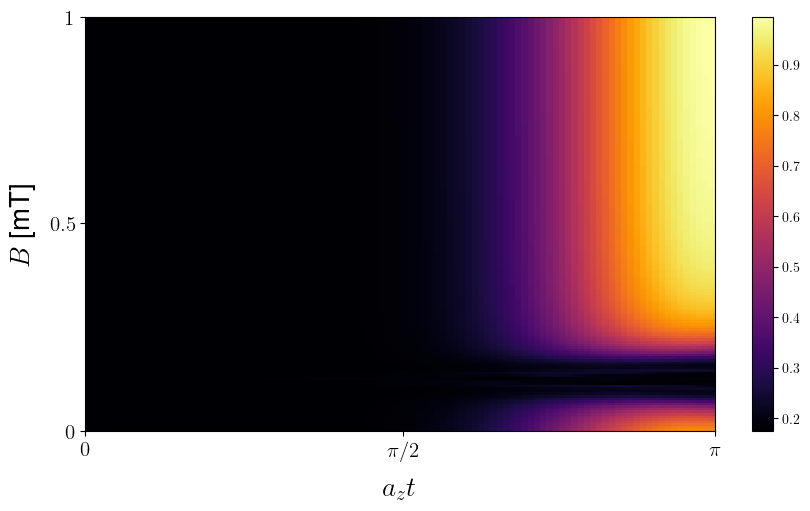

In [24]:
M = 100
fold = 1
tlist = np.linspace(0, fold*T_z, M+1) # U_z
K = 16*M//10
Blist = np.linspace(0, 1, K+1)
fig, axis = plt.subplots(layout='constrained',sharex=True,sharey=False,figsize=(8,5))

p = axis.pcolormesh(fidel_mesh, cmap = 'inferno')
fig.colorbar(p)

axis.set_yticks([0,K//2+1,K+1],[r'$0$',r'$0.5$',r'$1$'], fontsize=15)
axis.set_ylabel(r'$B$ [mT]', fontsize=20, labelpad=10)
axis.set_xticks([0,M//2+1,M+1],[r'$0$',r'$\pi/2$',r'$\pi$'], fontsize=15)
axis.set_xlabel(r'$a_zt$', fontsize=20, labelpad=10)

# y = [np.argmax(fidel_mesh)//len(tlist)]
# x = [np.argmax(fidel_mesh)%len(tlist)] 
# plt.scatter(x, y, c ="blue", linewidths = 2,  marker ="o", s = 50)

# axis.set_ylim(0,7)
# axis.set_xlim(0,7)

# axis.text(0.05, 0.90, r'a.)',transform=axis.transAxes,size=15,backgroundcolor='white')


plt.savefig('Fidelity_Z-zy-axis_vary-B-and-t.pdf',bbox_inches='tight')

In [23]:
M = 100
fold = 1
tlist = np.linspace(0, fold*T_z, M+1) # U_z
K = 16*M//10
Blist = np.linspace(0, 1, K+1)

import pickle
fidel_mesh = pickle.load(open("Fidelity_Z-zy-axis_vary-B-and-t","rb"))

In [24]:
len(fidel_mesh)

161

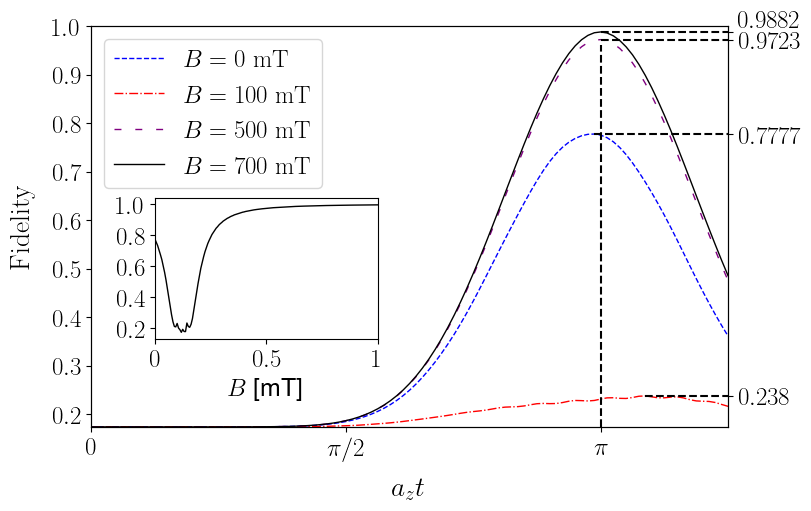

In [40]:
M = 100
fold = 1.25
M_ref = int(M//fold)
tlist = np.linspace(0, fold*T_z, M+1) # U_z

fig, axis = plt.subplots(layout='constrained',sharex=True,sharey=False,figsize=(8,5))

CR = ['b','r','purple','k']
CS = ['--', '-.',(0, (5, 10)),'-']

line = [[] for k in range(len(Blist1))]
# line[0], = axis.plot(tlist*Azz.mean()/2, fidel[:], 'b', lw=1, label=r"Ideal")
for k in range(len(Blist1)):
    line[k], = axis.plot(tlist*Azz.mean()/2, fidel_exact[k,:], CR[k], ls=CS[k], lw=1, label=r"$B = "+str(int(Blist1[k]*1e3))+r"{~\rm mT}$")

max_list = [np.around(np.max(fidel_exact[k]),decimals=4) for k in [0,1,2]]
max_list_lab = [r'$'+str(ylab)+'$' for ylab in max_list]
# max_list = [np.around(fidel_exact[k,M],decimals=4) for k in range(len(Blist1))]

axis.set_xlabel(r'$a_zt~$', fontsize=20, labelpad=10)
axis.set_xticks(np.array([0,np.pi/2,tlist[M_ref]*Azz.mean()/2]),[r'$0$',r'$\pi/2$',r'$\pi$'], fontsize=18)
# axis.set_xticks(np.array([0,np.pi/2,np.pi]),[r'$0$',r'$\pi/2$',r'$\pi$'], fontsize=15)
axis.set_ylabel(r'$\rm Fidelity$', fontsize=20, labelpad=40)
axis.set_yticks(max_list + [np.max(fidel_exact[3])], max_list_lab + [None], fontsize=18)
axis.autoscale(enable=True, axis='x', tight=True)
axis.legend(handles=line, fontsize=18,loc='upper left')

#axis.yaxis.set_label_position("right")
# axis.yaxis.tick_right()


axis3 = axis.twinx()
axis3.yaxis.tick_left()
axis.yaxis.tick_right()

ylist = [np.around(k/10,decimals=1) for k in range(1,11)]
ylist_lab = [r'$'+str(ylab)+'$' for ylab in ylist]
axis3.set_yticks(ylist, ylist_lab, fontsize=18)

axis.set_ylim(np.min(fidel_exact), 1)
axis3.set_ylim(np.min(fidel_exact), 1)



##############################################################
axis2 = axis.inset_axes([0.1, 0.22, 0.35, 0.35])

# M = 100
# fold = 1
# tlist = np.linspace(0, fold*T_z, M+1) # U_z
K = 16*M//10
Blist = np.linspace(0, 1, K+1)
axis2.plot(Blist, fidel_mesh[:,M], CR[k], ls=CS[k], lw=1, label=r"at $t=a_z^{-1}\pi$")

axis2.set_xticks(np.array([0,0.5,1]),[r'$0$',r'$0.5$',r'$1$'], fontsize=18)
axis2.set_xlabel(r'$B$ [mT]', fontsize=18, labelpad=5)

ylist = [np.around(k/5,decimals=1) for k in range(1,6)]
ylist_lab = [r'$'+str(ylab)+'$' for ylab in ylist]
axis2.set_yticks(ylist, ylist_lab, fontsize=18)
# axis2.set_ylabel(r'Fidelity', fontsize=12, labelpad=5)
axis2.autoscale(enable=True, axis='x', tight=True)


# t_ref = tlist[M_ref]*Azz.mean()/2
t_ref = tlist[np.argmax(fidel_exact[3])]*Azz.mean()/2
F_max = np.max(fidel_exact[3])-0.035
axis.axvline(x=t_ref, ymin = 0, ymax = F_max, color='k', linestyle='--')
for k in [0,1,2,3]:
    axis.axhline(y = np.max(fidel_exact[k]), xmin = tlist[np.argmax(fidel_exact[k])]/np.max(tlist), xmax = 1, color='k', linestyle='--')

# axis.text(tlist[np.argmax(fidel_exact[3])]*Azz.mean()/2, np.max(fidel_exact[3]),np.around(np.max(fidel_exact[3]),decimals=4), fontsize=15)
axis.text(np.max(tlist)*Azz.mean()/2 + 0.056, np.max(fidel_exact[3]) + 0.01, r'$'+str(np.around(np.max(fidel_exact[3]),decimals=4))+r'$', fontsize=18)

# axis.set_ylim(np.min(fidel_exact), 1)

# plt.yticks(rotation=45)
# axis.text(0.05, 0.90, r'b.)',transform=axis.transAxes,size=15)

plt.savefig('Fig3_Fidelity_Weyl_Z-zy-axis+inset.pdf',bbox_inches='tight')

In [60]:
tlist[np.argmax(fidel_exact[3])]

0.13046842327818298

In [61]:
tlist[M_ref]

0.13046842327818298

In [9]:
(np.pi/(Azz.mean()/2))*1e3/(2*np.pi)

20.76469448212852

In [41]:
import pickle
pickle.dump(fidel_mesh, open("Fidelity_Z-zy-axis_vary-B-and-t", "wb"))

In [35]:
np.abs(tlist[M_ref]-tlist[np.argmax(fidel_exact[3])])*Azz.mean()/2

0.0

In [36]:
np.abs(tlist[M_ref]-tlist[np.argmax(fidel_exact[3])])

0.0

In [55]:
max_list.append(None)

In [58]:
max_list

[0.7777, 0.238, 0.9723, 0.9882, None]

In [60]:
max_list.insert(len(max_list),None)

In [70]:
max_list

[0.7777, 0.238, 0.9723]

In [71]:
max_list + [None]

[0.7777, 0.238, 0.9723, None]

In [72]:
max_list

[0.7777, 0.238, 0.9723]